# BTS 자료분석
> Best Trip Service
> (원자료) 국민여행조사_국내여행

- 이전 원자료 수정 작업
- 결측치가 많은정보 제거 (2일차 이후의 여행정보 제거)
- 해석하기 어려운 데이터 제거 (여행자의 올해 여행 정보)
- 불필요한 데이터 제거 (여행을 가지 않은 이유)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

In [359]:
data = pd.read_csv('(원자료) 2020년 국민여행조사_국내여행.csv',index_col='ID')


In [360]:
data['total']

KeyError: 'total'

In [361]:
d11 = data['A11']
d12 = data['A12']
d13 = data['A13']

data['total'] = d11 + d12 +d13
# data['total'] = data['total'].map({True:1,False:0})

data.drop(['A11'], axis=1, inplace= True)
data.drop(['A12'], axis=1, inplace= True)
data.drop(['A13'], axis=1, inplace= True)
data.drop(['BARA'],axis=1, inplace= True)

data.drop(['WT_DOM'],axis=1, inplace=True)
data.drop(['BJOB'],axis=1, inplace= True)
data.drop(['BINC1'],axis=1, inplace= True)
data.drop(['BMON'],axis=1, inplace= True)
data.drop(['BMAR'],axis=1, inplace= True)

In [362]:
data = data[data['D_TRA1_CHECK']=='Y']
data = data[data['D_TRA1_CASE']==1]

In [363]:
spot = data['D_TRA1_1_SPOT']

In [364]:
data.shape

(10638, 50)

# 결측치 처리

In [365]:
all_na = (data.isnull().sum() / len(data)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_na})

Text(0.5, 1.0, 'Percent missing data by feature')

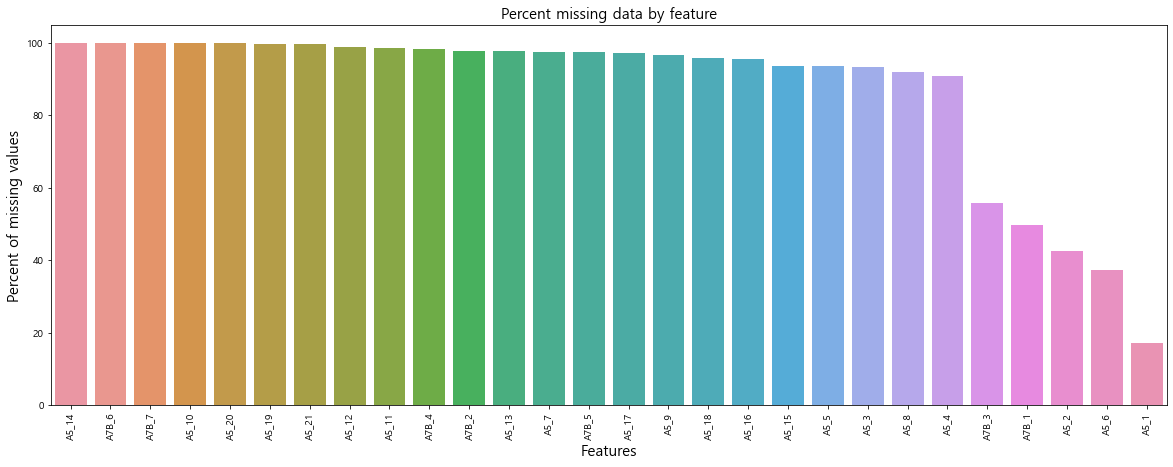

In [366]:
f, ax = plt.subplots(figsize=(20, 7))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [367]:
# 여행활동 이진 변수로 변경
for i in range(21):
    data['A5_{}'.format(i+1)] = data['A5_{}'.format(i+1)].fillna(0)
    data['A5_{}'.format(i+1)] = data['A5_{}'.format(i+1)].map({i+1:1,0:0})
# 여행 동반자 유형
for i in range(7):
    data['A7B_{}'.format(i+1)] = data['A7B_{}'.format(i+1)].fillna(0)
    data['A7B_{}'.format(i+1)] = data['A7B_{}'.format(i+1)].map({i+1:1,0:0})

In [368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10638 entries, 11080760641_204453 to 3902057133A_260717
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   D_TRA1_CHECK     10638 non-null  object 
 1   D_TRA1_CASE      10638 non-null  float64
 2   D_TRA1_SMONTH    10638 non-null  float64
 3   D_TRA1_SDAY      10638 non-null  float64
 4   D_TRA1_EMONTH    10638 non-null  float64
 5   D_TRA1_EDAY      10638 non-null  float64
 6   D_TRA1_S_Day     10638 non-null  float64
 7   D_TRA1_COST      10638 non-null  float64
 8   D_TRA1_NUM       10638 non-null  float64
 9   D_TRA1_ONE_COST  10638 non-null  float64
 10  D_TRA1_1_SPOT    10638 non-null  float64
 11  A1_1             10638 non-null  int64  
 12  A4_1             10638 non-null  int64  
 13  A5_1             10638 non-null  int64  
 14  A5_2             10638 non-null  int64  
 15  A5_3             10638 non-null  int64  
 16  A5_4             10638 non-null  

In [369]:
data

,D_TRA1_CHECK,D_TRA1_CASE,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EMONTH,D_TRA1_EDAY,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,...,A7B_6,A7B_7,A9,NA9,BSEX,BAGE,SAGE,BEDU,BFAM,total
ID,,,,,,,,,,,,,,,,,,,,,
11080760641_204453,Y,1.0,8.0,9.0,8.0,9.0,0.0,40000.0,1.0,40000.0,...,0,0,77000,39500,1,4,45,3,3,7
21110610901_148196,Y,1.0,6.0,22.0,6.0,23.0,1.0,90000.0,1.0,90000.0,...,0,0,249997,78571,1,2,25,4,1,7
2231011065A_7203,Y,1.0,1.0,17.0,1.0,17.0,0.0,90000.0,3.0,30000.0,...,0,0,90003,30001,2,5,53,3,3,8
2302055001A_181404,Y,1.0,7.0,25.0,7.0,25.0,0.0,21000.0,2.0,22000.0,...,0,0,44000,22000,1,3,35,4,2,8
2305060097A_38902,Y,1.0,2.0,29.0,2.0,29.0,0.0,40000.0,2.0,20000.0,...,0,0,39400,19700,2,1,19,3,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901053052A_112093,Y,1.0,4.0,18.0,4.0,18.0,0.0,150000.0,4.0,37500.0,...,0,0,150000,52500,1,3,38,4,3,15
3901054306A_172336,Y,1.0,6.0,28.0,6.0,28.0,0.0,30000.0,2.0,15000.0,...,0,0,30000,15000,2,3,35,4,2,15
39010631871_142345,Y,1.0,2.0,21.0,2.0,21.0,0.0,20000.0,1.0,20000.0,...,0,0,20000,20000,1,4,41,4,3,15


# 변수 분류

In [370]:
for i in data:
    print(f'"{i}",')

"D_TRA1_CHECK",
"D_TRA1_CASE",
"D_TRA1_SMONTH",
"D_TRA1_SDAY",
"D_TRA1_EMONTH",
"D_TRA1_EDAY",
"D_TRA1_S_Day",
"D_TRA1_COST",
"D_TRA1_NUM",
"D_TRA1_ONE_COST",
"D_TRA1_1_SPOT",
"A1_1",
"A4_1",
"A5_1",
"A5_2",
"A5_3",
"A5_4",
"A5_5",
"A5_6",
"A5_7",
"A5_8",
"A5_9",
"A5_10",
"A5_11",
"A5_12",
"A5_13",
"A5_14",
"A5_15",
"A5_16",
"A5_17",
"A5_18",
"A5_19",
"A5_20",
"A5_21",
"A7",
"A7B_1",
"A7B_2",
"A7B_3",
"A7B_4",
"A7B_5",
"A7B_6",
"A7B_7",
"A9",
"NA9",
"BSEX",
"BAGE",
"SAGE",
"BEDU",
"BFAM",
"total",


In [371]:
numeric = [
    "D_TRA1_COST","D_TRA1_NUM","D_TRA1_ONE_COST","A7",
]


In [372]:
nominal = [
    "D_TRA1_CHECK","D_TRA1_CASE","A1_1", "A4_1", 
    "BSEX", "BAGE", "SAGE", "BEDU", "BFAM", 
]
# 명목형 변수 인코딩
for col in nominal:
    data[col] = data[col].apply(str)

In [373]:
binary = [
    "A5_1", "A5_2", "A5_3", "A5_4", "A5_5", "A5_6", "A5_7", "A5_8",
    "A5_9", "A5_10", "A5_11", "A5_12", "A5_13", "A5_14", "A5_15",
    "A5_16", "A5_17","A5_18", "A5_19", "A5_20", "A5_21", "A7B_1",
    "A7B_2", "A7B_3", "A7B_4", "A7B_5", "A7B_6", "A7B_7",
]

In [374]:
data["D_TRA1_1_SPOT"] = data["D_TRA1_1_SPOT"].apply(str)

Text(0, 0.5, 'count')

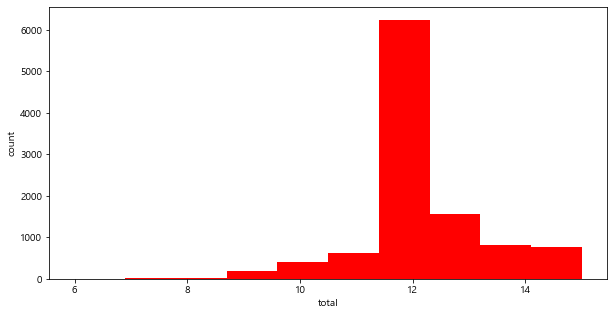

In [375]:
plt.figure(figsize=(10,5))
plt.hist(data['total'],color='red')
plt.xlabel('total')
plt.ylabel('count')

In [376]:
data.corr()['total'].sort_values().head(20)

D_TRA1_NUM    -0.019941
D_TRA1_SDAY   -0.015230
A7B_4         -0.009253
A7B_7         -0.008944
A5_21         -0.008737
A7B_3         -0.008735
A7B_2         -0.007490
D_TRA1_EDAY   -0.005484
A5_18         -0.004134
A5_20         -0.002553
A5_13          0.001446
A5_10          0.001660
A7B_5          0.002433
A5_17          0.004912
A5_14          0.004990
A5_12          0.005222
A5_19          0.007888
A7B_6          0.009622
A5_16          0.011378
A5_4           0.017114
Name: total, dtype: float64

In [377]:
feature = []

연속형 변수
- 피어슨 상관 계수
연속형 변수 2개의 상관 관계를 확인하기 위한 가장 기본적인 방법이다.
정확히 말해서 두개의 수치값들의 집합이 있을 때 이 두개의 수치값들은 각각의 순서쌍에 대해서 연결관계가 있다고 할 때 두 수치값이 서로 관련이 있는지를 확인하는 방법이다.

흔한 예로 있는 것이 고등학생 한 학급에 50명이 있다고 할 때 이 학생들의 수학과목의 성적과 물리과목의 성정이 관련이 있는지 확인하는 것이 있다. 즉 수학과목과 물리과목은 서로 수리적 또는 과학적 능력과 관련이 있어 두 과목은 서로 관련이 있을 것이라는 가설을 어느 정도 두고 있으며 실제로 그런지 확인한다.

p-value가 0.05보다 클 경우 변수간의 상관관계가 존재하지 않음
https://intothedata.com/02.scholar_category/statistics/correlation/

https://bskyvision.com/754

In [378]:
from scipy import stats
for i in numeric:
    corr, pval = stats.pearsonr(data[i],data['total'])
    if pval <0.05:
        print(i,pval)
        feature.append(i)

D_TRA1_COST 8.193521581809766e-32
D_TRA1_NUM 0.039716616444884355
D_TRA1_ONE_COST 6.815594869600631e-45
A7 0.00168026891299694


이진 변수
- 점 양분 상관 계수
한 변수는 있음/없음, 네/아니오 등으로 이분형(binary) 이고, 다른 한 변수는 연속형인 경우에도 상관계수를 구할 수 있습니다.

p-value가 0.05보다 클 경우 변수간의 상관관계가 존재하지 않음
https://mansoostat.tistory.com/115

In [379]:
from scipy.stats import pointbiserialr
for i in binary:
    corr, pval = pointbiserialr(data[i],data['total'])
    if pval <0.05:
        print(i,pval)
        feature.append(i)

A5_1 1.2507608161867092e-15
A5_2 1.3776589130626026e-12
A5_3 4.200853642766333e-05
A5_5 5.1001395482705036e-11
A5_6 1.2103017019308116e-16
A5_7 0.0001596333560036141
A5_8 2.3331596189014033e-08
A5_9 1.3091696816493663e-06
A5_11 0.005947898068389028
A5_15 1.0593630275556755e-10
A7B_1 0.015392003228225927


명목형 변수 one-hot-encoding

In [380]:
nominal

obdata=pd.DataFrame()
for i in nominal:
    obdata[i]=data[i]
obdata = pd.get_dummies(obdata)

In [381]:
obdata

,D_TRA1_CHECK_Y,D_TRA1_CASE_1.0,A1_1_1,A1_1_10,A1_1_11,A1_1_2,A1_1_3,A1_1_4,A1_1_5,A1_1_6,...,SAGE_85,SAGE_86,SAGE_87,BEDU_1,BEDU_2,BEDU_3,BEDU_4,BFAM_1,BFAM_2,BFAM_3
ID,,,,,,,,,,,,,,,,,,,,,
11080760641_204453,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
21110610901_148196,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2231011065A_7203,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2302055001A_181404,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2305060097A_38902,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901053052A_112093,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3901054306A_172336,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
39010631871_142345,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [382]:
obfeature=[]
for i in obdata.dtypes.index:
    corr, pval = pointbiserialr(obdata[i],data['total'])
    if pval <0.05:
        print(i,'   ',pval)
        obfeature.append(i)

A1_1_11     0.012462268360594183
A1_1_3     1.8254581128848668e-10
A1_1_5     0.0017175228705159178
A1_1_6     6.332458173729557e-14
A1_1_8     0.0011416267210947924
A4_1_1     2.4751323042512123e-06
A4_1_11     0.017885012421438636
A4_1_15     0.0013613575355107491
A4_1_2     1.2849846381423616e-05
A4_1_3     0.0003223964870770351
A4_1_4     1.1856741913217878e-07
A4_1_6     0.00876894602290845
BAGE_1     0.00038753912151751063
SAGE_19     5.4421655099891955e-05
SAGE_23     0.010589841130966976
SAGE_25     0.000258912780371917
SAGE_28     0.010302589187112536
SAGE_34     0.008584893591734342
SAGE_44     0.01696137028388694
SAGE_54     0.006913997918152521
SAGE_59     0.0007499842045786476
SAGE_68     0.008622555302728763
SAGE_75     0.039642360634418984
SAGE_82     0.034452492972084206
BEDU_3     0.04006373671246476
BEDU_4     0.0116371891652315


C:\Users\rhkdg\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [383]:
data["D_TRA1_1_SPOT"] = data["D_TRA1_1_SPOT"].apply(str)
local = data["D_TRA1_1_SPOT"]

local = pd.get_dummies(local)
location = []
for i in local.dtypes.index:
    location.append(i)

In [384]:
obdata

,D_TRA1_CHECK_Y,D_TRA1_CASE_1.0,A1_1_1,A1_1_10,A1_1_11,A1_1_2,A1_1_3,A1_1_4,A1_1_5,A1_1_6,...,SAGE_85,SAGE_86,SAGE_87,BEDU_1,BEDU_2,BEDU_3,BEDU_4,BFAM_1,BFAM_2,BFAM_3
ID,,,,,,,,,,,,,,,,,,,,,
11080760641_204453,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
21110610901_148196,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2231011065A_7203,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2302055001A_181404,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2305060097A_38902,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901053052A_112093,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3901054306A_172336,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
39010631871_142345,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [385]:
X=pd.DataFrame()
for i in feature:
    X[i] = data[i]
    
for i in obfeature:
    X[i] = obdata[i]
for i in local:
    X[i] = local[i]
y = data['total']

C:\Users\rhkdg\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [386]:
X.index

Index(['11080760641_204453', '21110610901_148196', '2231011065A_7203',
       '2302055001A_181404', '2305060097A_38902', '2402069106A_324336',
       '25030560931_97381', '2504054317A_125174', '2504061032A_11754',
       '2504061032A_11785',
       ...
       '38360420481_344130', '38380360191_111885', '38390110071_141400',
       '3901052184A_142569', '3901052184A_56268', '3901053052A_112093',
       '3901054306A_172336', '39010631871_142345', '39020520031_345686',
       '3902057133A_260717'],
      dtype='object', name='ID', length=10638)

In [387]:
y

ID
11080760641_204453     7
21110610901_148196     7
2231011065A_7203       8
2302055001A_181404     8
2305060097A_38902      7
                      ..
3901053052A_112093    15
3901054306A_172336    15
39010631871_142345    15
39020520031_345686    15
3902057133A_260717    14
Name: total, Length: 10638, dtype: int64

In [388]:
X

,D_TRA1_COST,D_TRA1_NUM,D_TRA1_ONE_COST,A7,A5_1,A5_2,A5_3,A5_5,A5_6,A5_7,...,38330.0,38340.0,38350.0,38360.0,38370.0,38380.0,38390.0,38400.0,39010.0,39020.0
ID,,,,,,,,,,,,,,,,,,,,,
11080760641_204453,40000.0,1.0,40000.0,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21110610901_148196,90000.0,1.0,90000.0,7,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2231011065A_7203,90000.0,3.0,30000.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2302055001A_181404,21000.0,2.0,22000.0,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2305060097A_38902,40000.0,2.0,20000.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901053052A_112093,150000.0,4.0,37500.0,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3901054306A_172336,30000.0,2.0,15000.0,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
39010631871_142345,20000.0,1.0,20000.0,3,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [389]:
from sklearn.model_selection import cross_val_score # 교차검증
from sklearn.model_selection import StratifiedKFold

In [390]:
skf = StratifiedKFold(n_splits= 5 , shuffle= True, random_state=0)

In [405]:
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
# import statsmodels.api as sm
# '''
# Statsmodels 패키지는 검정 및 추정(test and estimation), 회귀분석(regression analysis), 
# 시계열 분석(time - series analysis) 등의 기능을 제공하는 파이썬 패키지이다.
# '''

# log_reg = LogisticRegression()

# log_reg.fit(X, y)
# x2 = sm.add_constant(X)
# model = sm.OLS(y, x2)
# result = model.fit()
# print(result.summary())

# print(f'score : {cross_val_score(log_reg, X, y, cv=skf).mean()}')

In [340]:
# log_reg.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [406]:
# log_reg.predict_proba(X.head())

In [393]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [394]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np


# 훈련/테스트 세트로 나누기

forest = RandomForestClassifier(n_estimators=100,                          
                                max_features = 0.8,
                                max_depth = 15,
                                n_jobs = -1,
                                random_state = 0)
forest.fit(X_train,y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))
print(f'score : {cross_val_score(forest, X, y, cv=skf).mean()}')

훈련 세트 정확도 : 0.642
테스트 세트 정확도 : 0.594


C:\Users\rhkdg\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


score : 0.5874239321836833


In [395]:
forest.predict_proba(X)

array([[0.00000000e+00, 1.87280496e-01, 1.38955213e-04, ...,
        1.53935696e-01, 3.82627458e-02, 5.17785925e-02],
       [0.00000000e+00, 1.33838288e-01, 8.44421912e-04, ...,
        9.43786063e-02, 3.46418713e-02, 5.68037879e-02],
       [0.00000000e+00, 2.38369656e-03, 5.22736785e-02, ...,
        8.68441827e-02, 3.79673617e-02, 3.07382418e-02],
       ...,
       [0.00000000e+00, 5.44575268e-04, 4.42507909e-04, ...,
        9.51538755e-02, 7.49989437e-02, 2.13408285e-01],
       [4.59246439e-04, 6.31875099e-04, 1.70806389e-03, ...,
        1.54106329e-01, 6.82491951e-02, 2.35764154e-01],
       [0.00000000e+00, 1.41025926e-03, 4.97590041e-04, ...,
        5.48435766e-02, 3.42805611e-01, 3.86450518e-02]])

In [396]:
data['D_TRA1_1_SPOT']

ID
11080760641_204453    31170.0
21110610901_148196    38090.0
2231011065A_7203      37310.0
2302055001A_181404    31010.0
2305060097A_38902     11010.0
                       ...   
3901053052A_112093    39020.0
3901054306A_172336    39020.0
39010631871_142345    39020.0
39020520031_345686    39010.0
3902057133A_260717    39010.0
Name: D_TRA1_1_SPOT, Length: 10638, dtype: object

In [397]:
a=sorted(data['D_TRA1_1_SPOT'].values[:]

SyntaxError: unexpected EOF while parsing (<ipython-input-397-6b595d51ea87>, line 1)

In [398]:
n = 1
for i in X:
    print(i, n)
    n+=1

D_TRA1_COST 1
D_TRA1_NUM 2
D_TRA1_ONE_COST 3
A7 4
A5_1 5
A5_2 6
A5_3 7
A5_5 8
A5_6 9
A5_7 10
A5_8 11
A5_9 12
A5_11 13
A5_15 14
A7B_1 15
A1_1_11 16
A1_1_3 17
A1_1_5 18
A1_1_6 19
A1_1_8 20
A4_1_1 21
A4_1_11 22
A4_1_15 23
A4_1_2 24
A4_1_3 25
A4_1_4 26
A4_1_6 27
BAGE_1 28
SAGE_19 29
SAGE_23 30
SAGE_25 31
SAGE_28 32
SAGE_34 33
SAGE_44 34
SAGE_54 35
SAGE_59 36
SAGE_68 37
SAGE_75 38
SAGE_82 39
BEDU_3 40
BEDU_4 41
11010.0 42
11020.0 43
11030.0 44
11040.0 45
11050.0 46
11060.0 47
11080.0 48
11090.0 49
11100.0 50
11110.0 51
11120.0 52
11130.0 53
11140.0 54
11150.0 55
11160.0 56
11170.0 57
11180.0 58
11190.0 59
11210.0 60
11220.0 61
11230.0 62
11240.0 63
11250.0 64
21010.0 65
21020.0 66
21030.0 67
21040.0 68
21050.0 69
21060.0 70
21070.0 71
21080.0 72
21090.0 73
21100.0 74
21110.0 75
21120.0 76
21130.0 77
21140.0 78
21310.0 79
22010.0 80
22020.0 81
22040.0 82
22050.0 83
22060.0 84
22070.0 85
22310.0 86
23010.0 87
23020.0 88
23030.0 89
23040.0 90
23050.0 91
23060.0 92
23070.0 93
23080.0 94
23310.0

In [399]:
#36~259 지역번호

In [404]:
cost= 4000000
n = 10
sample = [cost, cost//n, n, 1, 1, 1, 1, 1, 1,0,1,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
city = [0]*224
for i in range(224):
    city[i] = 1
    print(forest.predict_proba(pd.DataFrame(sample+city).T)[0][1])
    city[i] = 0

0.0003032583110926236
0.0002758265288105405
0.00025066929610613795
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.0003176675329946409
0.00031766753299464093
0.00031766753299464093
0.00024724499778337326
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.0003032583110926236
0.00031766753299464093
0.00024724499778337326
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.0002959755590250097
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.0002758265288105405
0.00031766753299464093
0.00031766753299464093
0.00031766753299464093
0.0002779061015831101
0.0003176675329946

In [ ]:
x-min/(max-min)
min = 0
max = 100